In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.inspection import DecisionBoundaryDisplay
import warnings 
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
warnings.filterwarnings('ignore')

In [3]:
path = '/kaggle/input/adult-census-income/adult.csv'
df = pd.read_csv(path)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


# Spot Checks

In [4]:
df.shape

(32561, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df.select_dtypes(include=['object'])

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,?,HS-grad,Widowed,?,Not-in-family,White,Female,United-States,<=50K
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
2,?,Some-college,Widowed,?,Unmarried,Black,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,United-States,<=50K
32557,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32558,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32559,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K


In [8]:
df.select_dtypes(include=['number'])

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,90,77053,9,0,4356,40
1,82,132870,9,0,4356,18
2,66,186061,10,0,4356,40
3,54,140359,4,0,3900,40
4,41,264663,10,0,3900,40
...,...,...,...,...,...,...
32556,22,310152,10,0,0,40
32557,27,257302,12,0,0,38
32558,40,154374,9,0,0,40
32559,58,151910,9,0,0,40


In [9]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           15
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       42
income                2
dtype: int64

In [10]:
df[df == '?'] = np.nan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# EDA

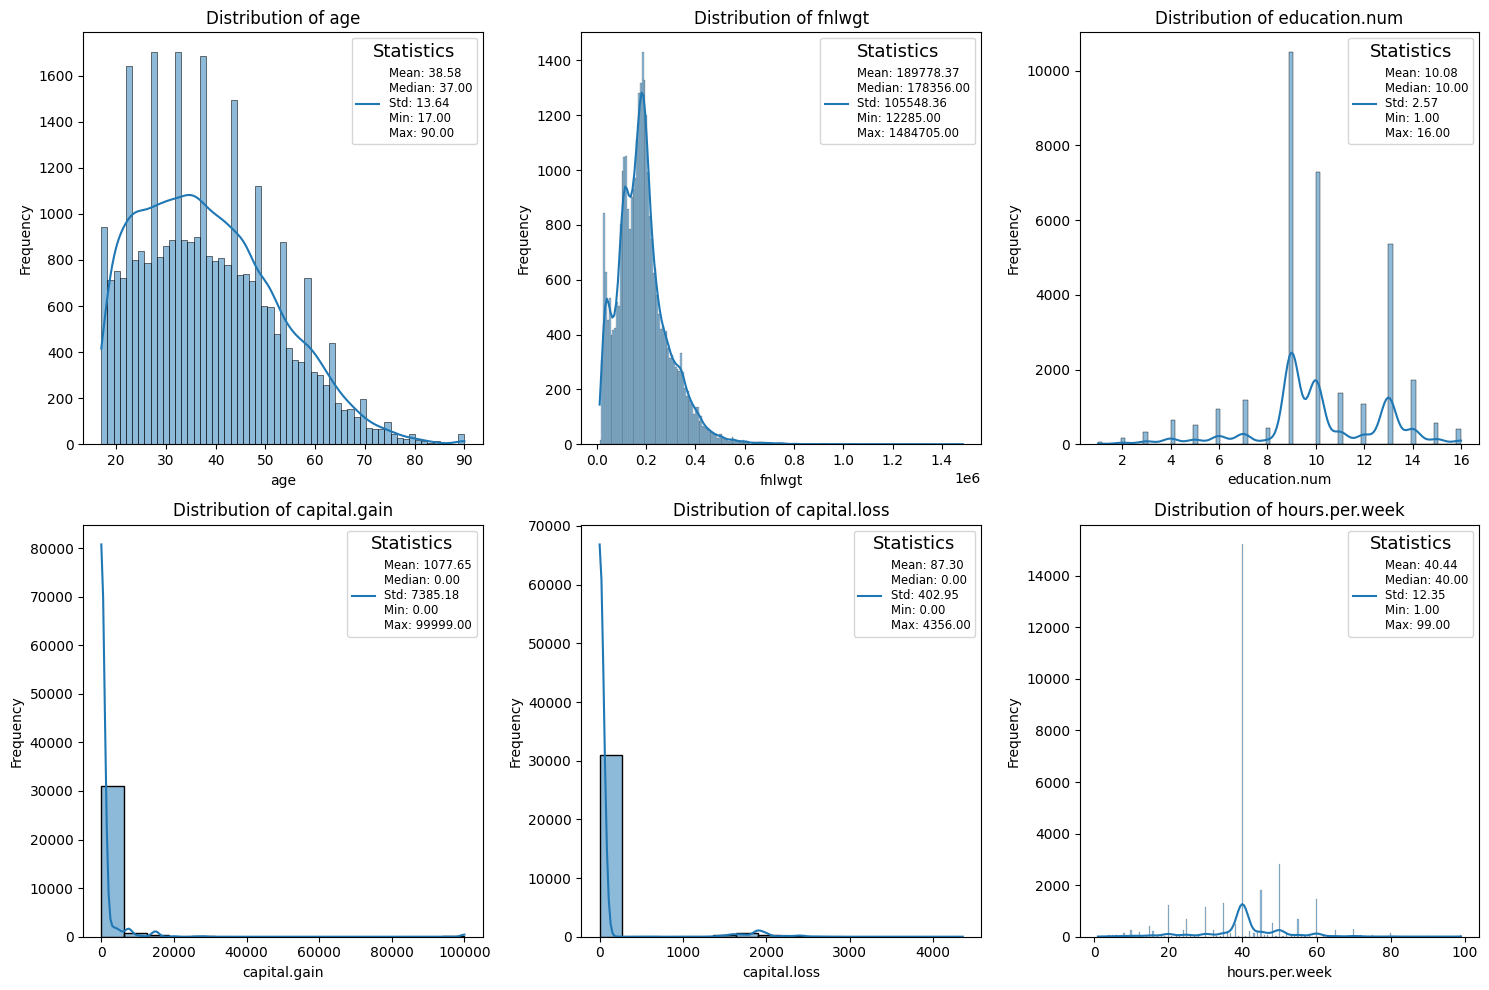

In [11]:
#numerical univariate analysis 
numerical_cols = df.select_dtypes(include=['number']).columns.to_list()

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    min_value = df[col].min()
    max_value = df[col].max()
    mean_value = np.mean(df[col])
    std_value = np.std(df[col])
    median_value = np.median(df[col])
    
    legend_text = (f'Mean: {mean_value:.2f}\n'
                   f'Median: {median_value:.2f}\n'
                   f'Std: {std_value:.2f}\n'
                   f'Min: {min_value:.2f}\n'
                   f'Max: {max_value:.2f}')
    axes[i].legend([legend_text], loc='upper right', fontsize='small', title='Statistics', title_fontsize='13')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')
    
plt.tight_layout()
plt.show()

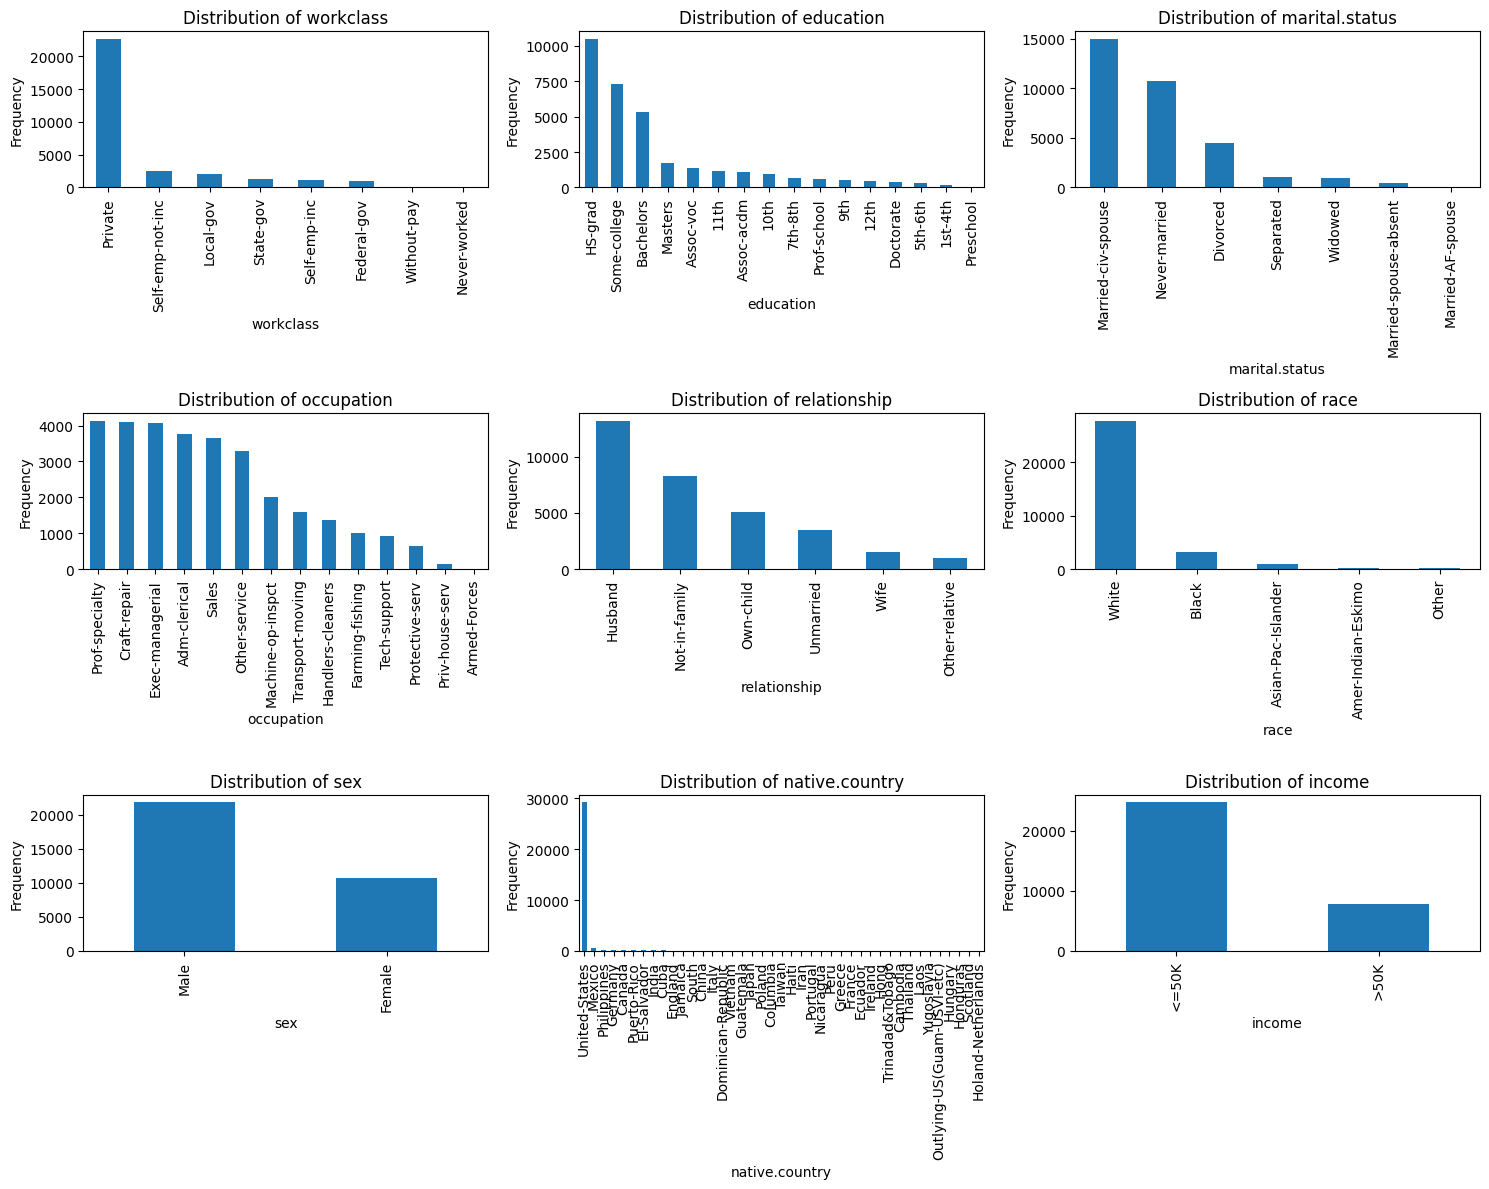

In [12]:
#categorical univariate analysis
cat_columns = df.select_dtypes(include=['object']).columns.to_list()
n_cols = 3
n_rows = (len(cat_columns) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))

axes = axes.flatten()
for i, column in enumerate(cat_columns):
    df[column].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


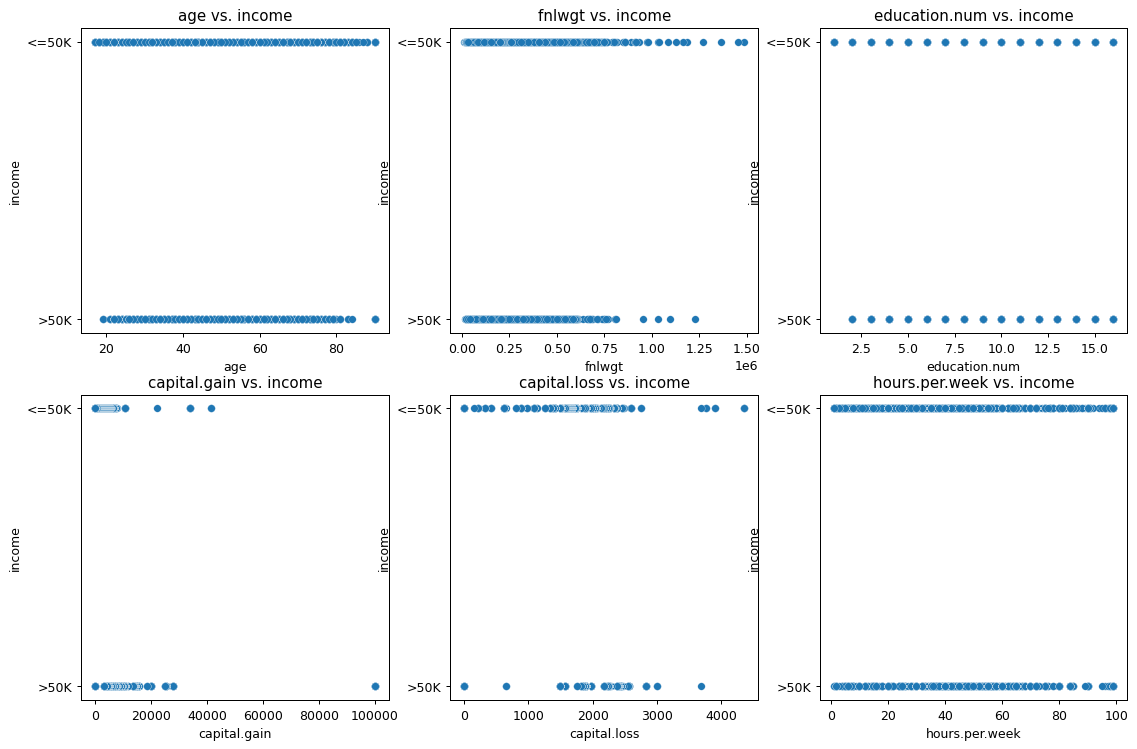

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

In [13]:
#bivariate numerical analysis 
target = 'income'
numerical_cols = df.select_dtypes(include=['number']).columns
numerical_cols = [col for col in numerical_cols if col != target] 

fig, axes = plt.subplots(3, 3, figsize=(15, 15), dpi=90)
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.scatterplot(x=df[col], y=df[target], ax=axes[i], linewidth=0.2)
    plt.figure(figsize=(5, 5))
    axes[i].set_title(f'{col} vs. {target}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(target)

for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

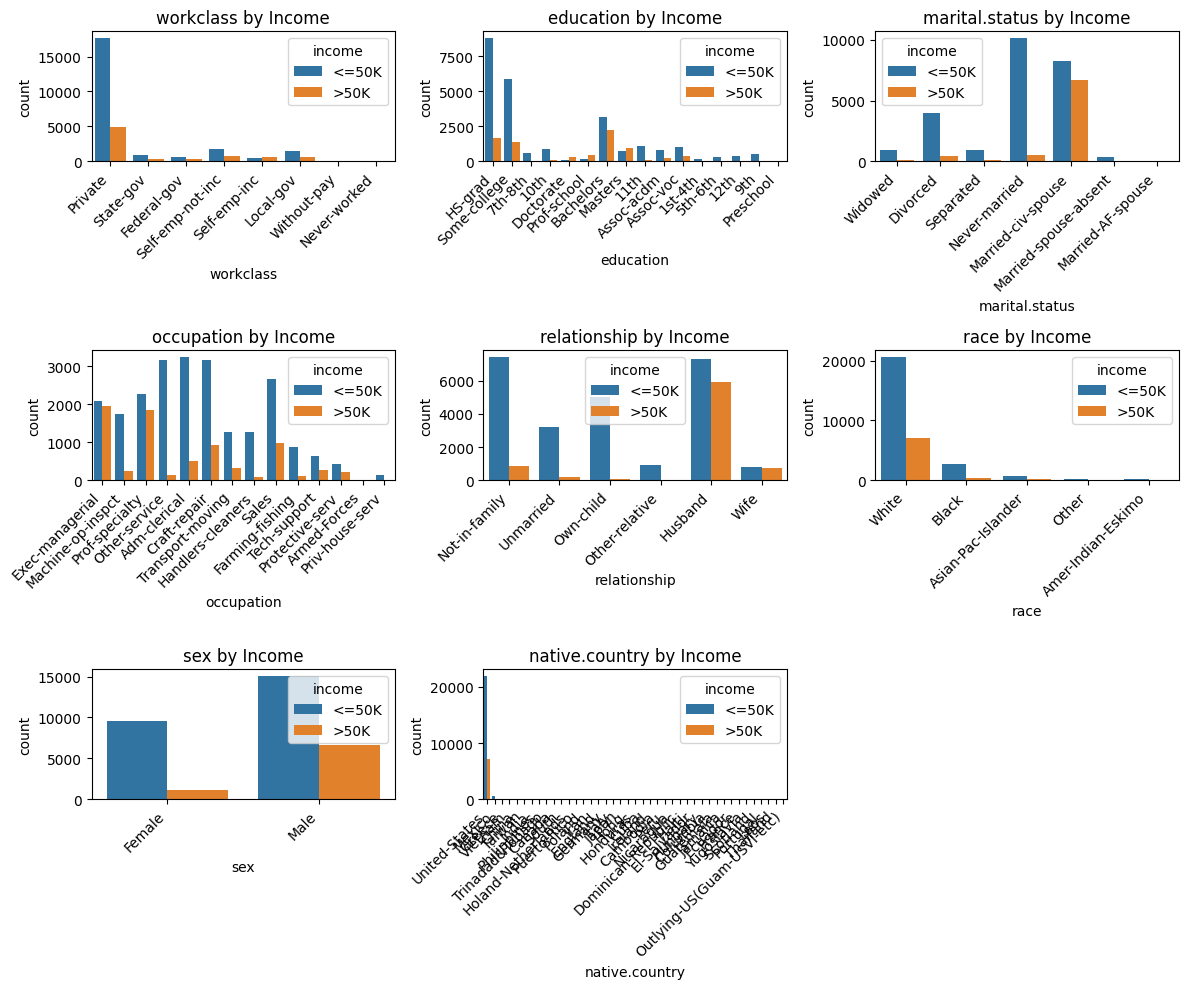

In [14]:
#bivariate categorical analysis
cat_cols = df.select_dtypes(include=['object']).columns.to_list()

n_cols_cat = 3
n_rows_cat = (len(cat_cols) - 1) // n_cols_cat + 1
fig_cat, axes_cat = plt.subplots(n_rows_cat, n_cols_cat, figsize=(12, 10))

axes_cat = axes_cat.flatten()

for i, col in enumerate(cat_cols[:-1]):  
    sns.countplot(data=df, x=col, hue='income', ax=axes_cat[i])
    axes_cat[i].set_title(f'{col} by Income')
    axes_cat[i].set_xticklabels(axes_cat[i].get_xticklabels(), rotation=45, ha='right')

for j in range(len(cat_cols) - 1, len(axes_cat)):
    axes_cat[j].axis('off')

plt.tight_layout()
plt.show()

# Outlier Handling 

In [15]:
df1 = df.copy()

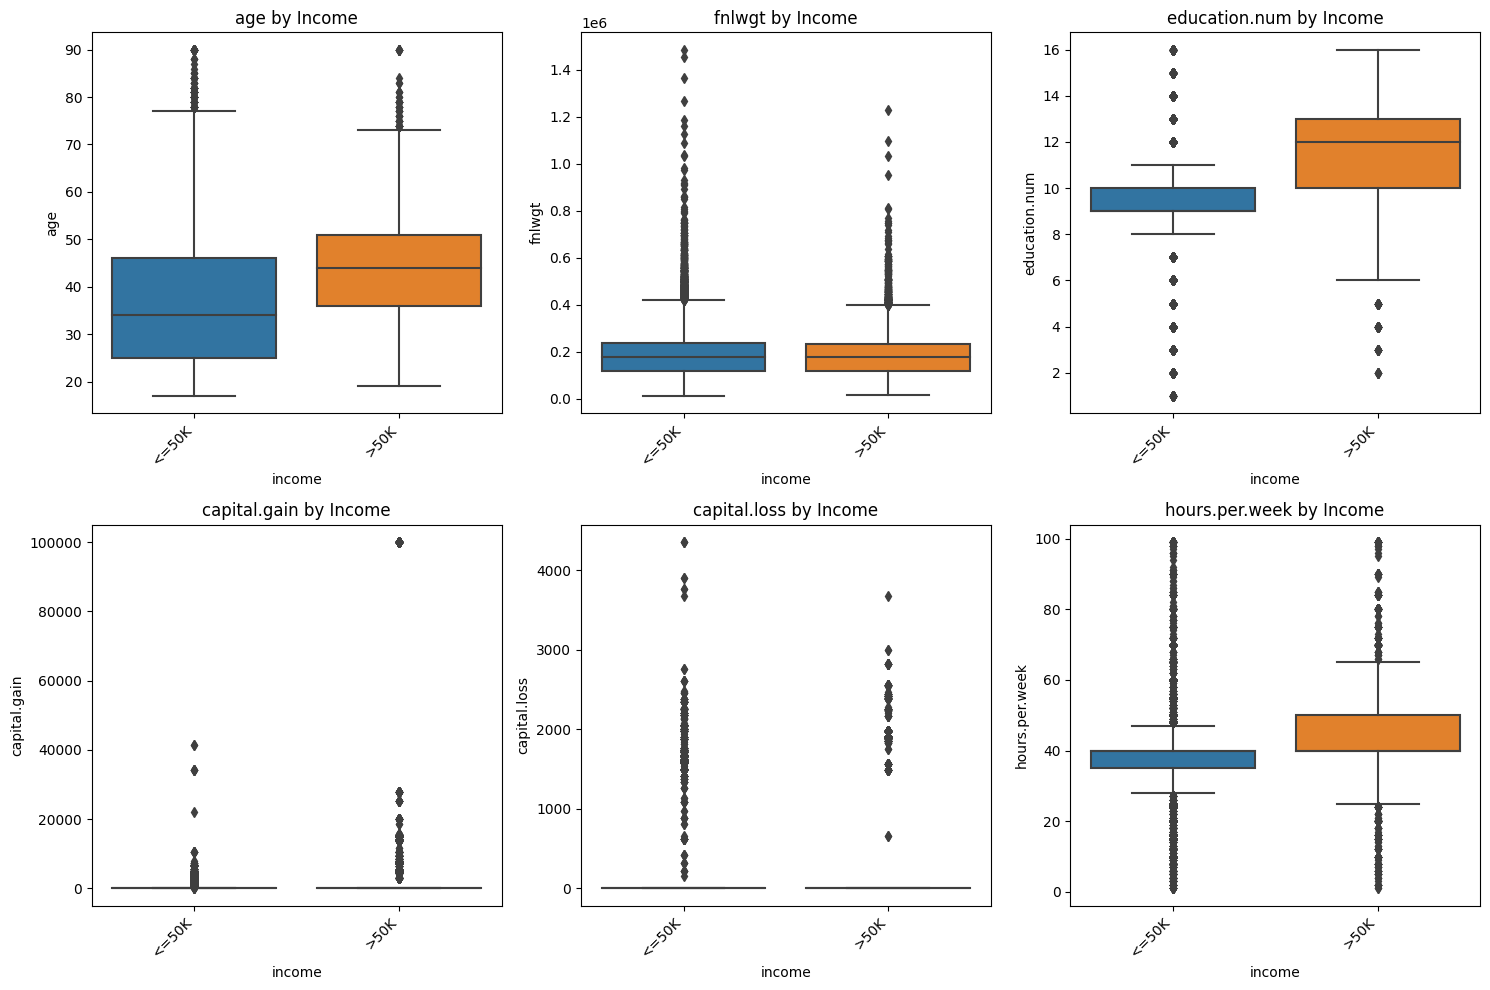

In [16]:
num_cols = df1.select_dtypes(include=['number']).columns.to_list()

n_cols = 3
n_rows = (len(num_cols) - 1) // n_cols + 1
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))

axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(data=df1, x='income', y=col, ax=axes[i])
    axes[i].set_title(f'{col} by Income')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')

for j in range(len(num_cols), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [17]:
#IQR 
numeric_cols = df1.select_dtypes(include=['number']).columns.to_list() 

outlier_indices = set()

for col in numeric_cols:
    first_quantile = df1[col].quantile(0.25)
    third_quantile = df1[col].quantile(0.75)
    iqr = third_quantile - first_quantile 
    lower_bound = first_quantile - iqr * 1.5 
    upper_bound = third_quantile + iqr * 1.5  
    
    outliers = df1[(df1[col] < lower_bound) | (df1[col] > upper_bound)]
    
    outlier_indices.update(outliers.index)
    
outlier_indices = list(outlier_indices)
# outlier_indices
    

# Model Building and Evaluation

In [18]:
X = df1.drop('income', axis = 1)
y = df1['income']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Test Multicollinearity

In [20]:
vif_data = pd.DataFrame()

X_train_numeric = X_train.select_dtypes(include=['number'])

vif_data['feature'] = X_train_numeric.columns 

vif_data['vif'] = [variance_inflation_factor(X_train_numeric.values, i) for i in range(len(X_train_numeric.columns))]
vif_data = vif_data.sort_values(by='vif', ascending=True)
vif_data['vif'] = vif_data['vif'].round(2)

print(vif_data)

          feature    vif
3    capital.gain   1.03
4    capital.loss   1.06
1          fnlwgt   3.71
0             age   7.30
5  hours.per.week   9.81
2   education.num  11.04


#### Initial Model Build

In [21]:
pipeline = Pipeline([
    ('one_hot', OneHotEncoder(handle_unknown='ignore')),
    ('imputer', SimpleImputer(strategy='mean')), 
    ('scaler', StandardScaler(with_mean=False)), 
    ('model', LogisticRegression())
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('one_hot', OneHotEncoder(handle_unknown='ignore')),
                ('imputer', SimpleImputer()),
                ('scaler', StandardScaler(with_mean=False)),
                ('model', LogisticRegression())])

In [22]:
y_pred = pipeline.predict(X_test)
score = accuracy_score(y_pred, y_test)
score

0.8217411331183786

#### Cross Validation 

In [23]:
X = df1.drop('income', axis = 1)
y = df1['income']

def cross_validation(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    pipeline = Pipeline([
        ('one_hot', OneHotEncoder(handle_unknown='ignore')),
        ('imputer', SimpleImputer(strategy='mean')), 
        ('scaler', StandardScaler(with_mean=False)), 
        ('model', LogisticRegressionCV(cv=5, random_state=42))
    ])
    
    scores = cross_val_score(pipeline, X_train, y_train)
    
    print(f'Cross Val Score: {scores}')
    print(f'Mean CV Score: {np.mean(scores)}')
    
    pipeline.fit(X_train, y_train)
    
    test_score = pipeline.score(X_test, y_test)
    
    print(f'Test Score: {test_score}')
    
    model = pipeline.named_steps['model']
    print(f'C hyperparam used for each class: {model.C_}')
    
cross_validation(X, y)                           

Cross Val Score: [0.83973129 0.84568138 0.84568138 0.84641966 0.84507583]
Mean CV Score: 0.8445179076962985
Test Score: 0.8404729003531399
C hyperparam used for each class: [0.00599484]


#### Re-build model with optimal alpha and evaluate Model Scores - Precision, Recall, F1, Confusion

In [24]:
pipeline = Pipeline([
    ('one_hot', OneHotEncoder(handle_unknown='ignore')),
    ('imputer', SimpleImputer(strategy='mean')), 
    ('scaler', StandardScaler(with_mean=False)), 
    ('model', LogisticRegression(C=0.00599484, penalty='l2')) #for multicollinearity
])
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

In [25]:
cf = confusion_matrix(y_test, y_pred)
cf

#4633 - TP 
#343 - FP 
#696 - FN 
#841 - TN

array([[4633,  343],
       [ 696,  841]])

In [26]:
def compute_scores(X_test, y_pred, y_test, pipeline):
    accuracy = pipeline.score(X_test, y_test)

    #precision = TP + (TP + FP)
    precision_majority = precision_score(y_test, y_pred, pos_label='<=50K')
    precision_minority = precision_score(y_test, y_pred, pos_label='>50K')
    
    #recall = TP + (TP + FN)
    recall_majority = recall_score(y_test, y_pred, pos_label='<=50K')
    recall_minority = recall_score(y_test, y_pred, pos_label='>50K')
    
    f1_majority = f1_score(y_test, y_pred, pos_label='<=50K')
    f1_minority = f1_score(y_test, y_pred, pos_label='>50K')
    
    return accuracy, precision_majority, precision_minority, recall_majority, recall_minority, f1_majority, f1_minority

accuracy, precision_majority, precision_minority, recall_majority, recall_minority, f1_majority, f1_minority = compute_scores(X_test, y_pred, y_test, pipeline)
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision for <=50K: {precision_majority:.2f}')
print(f'Precision for >50K: {precision_minority:.2f}')
print(f'Recall for <=50K: {recall_majority:.2f}')
print(f'Recall for >50K: {recall_minority:.2f}')
print(f'F1 Score for <=50K: {f1_majority:.2f}')
print(f'F1 Score for >50K: {f1_minority:.2f}')

Accuracy: 0.84
Precision for <=50K: 0.87
Precision for >50K: 0.71
Recall for <=50K: 0.93
Recall for >50K: 0.55
F1 Score for <=50K: 0.90
F1 Score for >50K: 0.62


#### PCA 

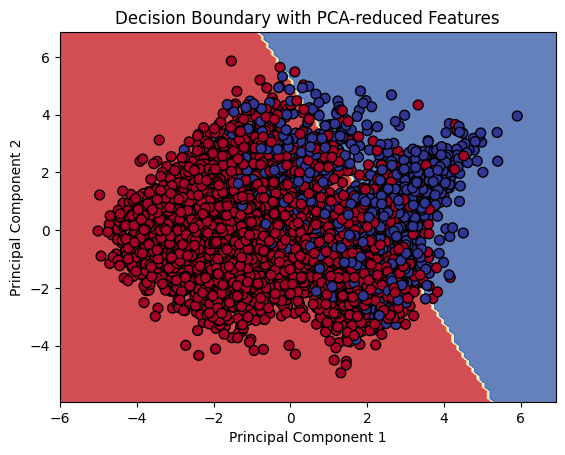

In [34]:
def apply_pca():
    X = df1.drop('income', axis=1)
    y = df1['income']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    le = LabelEncoder()
    y_train_enc = le.fit_transform(y_train)
    y_test_enc = le.transform(y_test)
    
    preprocessor = Pipeline([
        ('one_hot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler(with_mean=False))
    ])
    
    pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('pca', PCA(n_components=2)),  
        ('model', LogisticRegression(C=0.00599484, penalty='l2'))
    ])
    
    pipeline.fit(X_train, y_train_enc)

    pca_data = pipeline.named_steps['pca'].transform(pipeline.named_steps['preprocessing'].transform(X_test))
    
    DecisionBoundaryDisplay.from_estimator(pipeline.named_steps['model'], pca_data, response_method='predict', cmap=plt.cm.RdYlBu, alpha=0.8)
    
    plt.scatter(pca_data[:, 0], pca_data[:, 1], c=y_test_enc, edgecolor='k', s=50, cmap=plt.cm.RdYlBu)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Decision Boundary with PCA-reduced Features')
    plt.show()

apply_pca()

#### ROC AUC

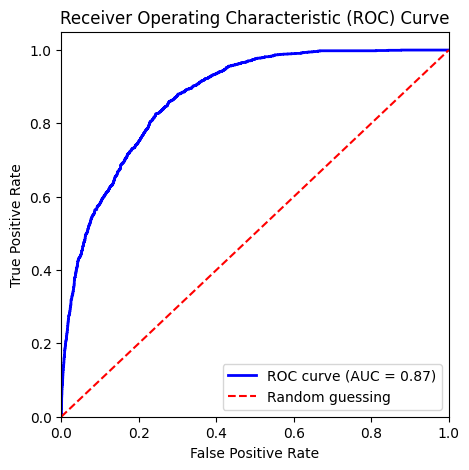

In [35]:
def plot_roc_auc_curve(X_train, X_test, y_train, y_test):
    enc = LabelEncoder()
    y_train_enc = enc.fit_transform(y_train)
    y_test_enc = enc.transform(y_test)
    
    pipeline = Pipeline([
        ('one_hot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
        ('imputer', SimpleImputer(strategy='mean')), 
        ('scaler', StandardScaler(with_mean=False)), 
        ('pca', PCA(n_components=2)),
        ('model', LogisticRegression(C=0.00599484, penalty='l2'))
    ]) 
    pipeline.fit(X_train, y_train_enc)
    
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
    
    fpr, tpr, thresholds = roc_curve(y_test_enc, y_pred_proba)
    roc_auc = roc_auc_score(y_test_enc, y_pred_proba)
    
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random guessing')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    
plot_roc_auc_curve(X_train, X_test, y_train, y_test)

# Test Other Models - Random Forest and XGBoost

In [ ]:
X = df1.drop('income', axis=1)
y = df1['income']
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
    ('imputer', SimpleImputer(strategy='mean')), 
    ('scaler', StandardScaler(with_mean=False)), 
    ('model', RandomForestClassifier(n_estimators=100))  
])

pipeline.fit(X_train, y_train)
score = pipeline.score(X_test, y_test)
score 